In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import scipy.stats as sts
#from scipy.stats import linregress

#### Government expenditure on education as share of GDP

In [4]:
# File to Load  # -- data from worldbank.org -- Gov expenditure on education, total (% of GDP)
gov_edu_data_to_load = "Resources/gov_edu_gdp.csv"


In [5]:
# Read the file and store into Pandas DataFrame
gov_edu_complete = pd.read_csv(gov_edu_data_to_load)#,index_col=0)
gov_edu_complete.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN,NaN,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162,NaN,NaN


In [11]:
# create reduced dataframe by droping not needed columns; keep 2000-2019

gov_edu_reduced=gov_edu_complete.drop(columns=gov_edu_complete.loc[:,'Indicator Name':'1999'])
gov_edu_reduced=gov_edu_reduced.dropna(how='all',axis=1) #drop nan columns

gov_edu_reduced.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,4.71468,4.73986,4.92365,NaN,4.40848,4.68132,NaN,4.81504,...,6.92927,6.11913,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
2,Angola,AGO,2.60753,NaN,NaN,NaN,NaN,2.12011,2.28146,NaN,...,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,3.43017,3.45870,3.11780,3.13824,3.22752,3.28155,3.19146,3.27593,...,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN
4,Andorra,AND,NaN,NaN,1.65971,NaN,1.54412,1.64497,2.24490,2.10469,...,2.97663,2.98706,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162


In [13]:
# export to csv
gov_edu_reduced.to_csv("output_data/df_gov_edu_gdp.csv")

In [15]:
#gov_edu_reduced['Country Code'].unique()

    # => USA; DEU; FRA; GBR; oecd=OED

In [16]:
# -- reduce to usa, deu, oecd 

#gov_edu_reduced.loc[gov_edu_reduced['Country Code']=='USA']
usa=gov_edu_reduced['Country Code']=='USA'
#usa
deu=gov_edu_reduced['Country Code']=='DEU'
oecd=gov_edu_reduced['Country Code']=='OED'

gov_edu_df=gov_edu_reduced[usa | deu | oecd]

gov_edu_df
                    # => only 2013 and 2014 available for USA

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
53,Germany,DEU,NaN,NaN,NaN,NaN,NaN,NaN,4.29396,4.36680,...,4.94368,4.82487,4.956580,4.96111,4.939620,4.83498,4.84022,4.905120,NaN,NaN
179,OECD members,OED,4.7814,4.964685,5.17923,5.09151,4.961865,4.93914,4.86411,4.71224,...,5.39121,5.11449,4.994975,5.13511,5.144385,5.10685,5.00711,4.994495,NaN,NaN
249,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.93105,4.961740,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


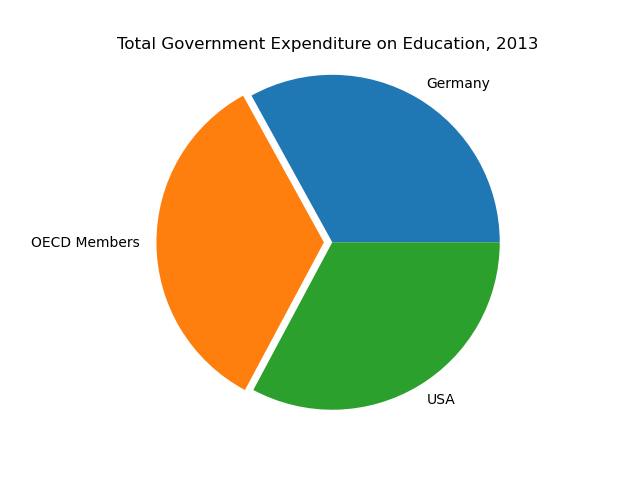

In [17]:
# -- as only 2013-2014 for USA
plt.subplot()

labels=['Germany', 'OECD Members', 'USA']
sizes=gov_edu_df['2013']

plt.pie(sizes, explode=(0,0.05,0), labels=labels)

plt.title("Total Government Expenditure on Education, 2013")
plt.axis('equal')

plt.show()

<IPython.core.display.Javascript object>


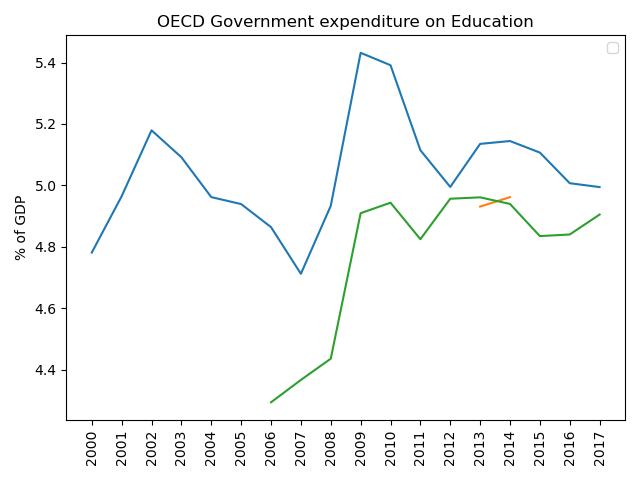

No handles with labels found to put in legend.


In [22]:
# OECD countries

x=gov_edu_df.columns[2:23]
y1=gov_edu_df.loc[179, '2000':'2019'].values
y2=gov_edu_df.loc[249, '2000':'2019'].values
y3=gov_edu_df.loc[53, '2000':'2019'].values

tick_label = gov_edu_df.columns[2:22]
plt.xticks(np.arange(0,20,1),tick_label,rotation='vertical')
plt.title("OECD Government expenditure on Education")
#plt.xlabel("Years")
plt.ylabel("% of GDP")

plt.plot(x,y1) #oecd
plt.plot(x,y2) #usa
plt.plot(x,y3) #germany

#plt.legend() #--??


plt.show()
plt.tight_layout()





---

In [ ]:
# File to Load -- worlbank file
#gov_health_data_gdp_to_load = "Resources/gov_health_gdp.csv"

#### Health expenditure per capita

In [24]:
# File to Load  # -- data from worldbank.org -- health expenditure per capita 
health_data_pcap_to_load = "Resources/gov_health_pcap.csv" 

health_complete = pd.read_csv(health_data_pcap_to_load)#,index_col=0)
health_complete.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,49.842609,NaN,NaN,NaN
2,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.616768,NaN,NaN,NaN
3,Albania,ALB,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,213.719742,236.957962,251.358261,192.885132,202.013321,226.280670,274.914093,NaN,NaN,NaN
4,Andorra,AND,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2342.568359,2432.782715,2529.089844,2246.254395,2361.217529,2567.423828,2821.801270,NaN,NaN,NaN


In [25]:
# create reduced dataframe by droping not needed columns
            # => keep 2000-2018

health_reduced=health_complete.drop(columns=health_complete.loc[:,'Indicator Name':'1999'])
health_reduced=health_reduced.dropna(how='all', axis=1) # drop nan columns if all nan
health_reduced.head()


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,15.803164,17.035744,20.412764,23.890501,27.836571,31.271839,...,41.722744,44.990532,50.853474,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,49.842609
2,Angola,AGO,12.998967,28.918121,29.049364,34.875187,49.810741,54.260777,69.812302,92.860306,...,119.996284,96.697014,122.107231,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.616768
3,Albania,ALB,80.616951,89.580734,96.271118,125.987976,156.568176,165.265335,174.530243,222.303665,...,186.442810,192.003220,211.075516,213.719742,236.957962,251.358261,192.885132,202.013321,226.280670,274.914093
4,Andorra,AND,1292.039429,1319.906006,1508.520752,1812.315796,2033.003540,2301.593506,2158.875732,2392.820312,...,2687.855957,2642.165527,2567.525391,2342.568359,2432.782715,2529.089844,2246.254395,2361.217529,2567.423828,2821.801270


In [26]:
# export to csv
health_reduced.to_csv("output_data/df_health_pcap.csv")

In [27]:
usa=health_reduced['Country Code']=='USA'
deu=health_reduced['Country Code']=='DEU'
oecd=health_reduced['Country Code']=='OED'

health_df=health_reduced[usa | deu | oecd] # make for usa, germany, oecd only

health_df

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
53,Germany,DEU,2344.354736,2346.614990,2567.491455,3152.780518,3459.809570,3558.198242,3697.921631,4182.799316,...,4674.783203,4611.810547,5036.484863,4762.847656,5096.820801,5304.318848,4622.206543,4742.034180,5052.673340,5472.202148
179,OECD members,OED,2163.627467,2240.499566,2422.082052,2745.835834,3024.606476,3186.839947,3356.591324,3646.104790,...,3948.965165,4084.234501,4381.756090,4393.193866,4424.219925,4540.897324,4384.504689,4520.350922,4673.457800,4899.667035
249,United States,USA,4564.455078,4914.940430,5332.493164,5741.299316,6103.584473,6454.683105,6821.107422,7172.166016,...,7681.247559,7930.151367,8130.756348,8399.239258,8599.527344,9023.611328,9491.090820,9877.871094,10209.630859,10623.849609


<IPython.core.display.Javascript object>


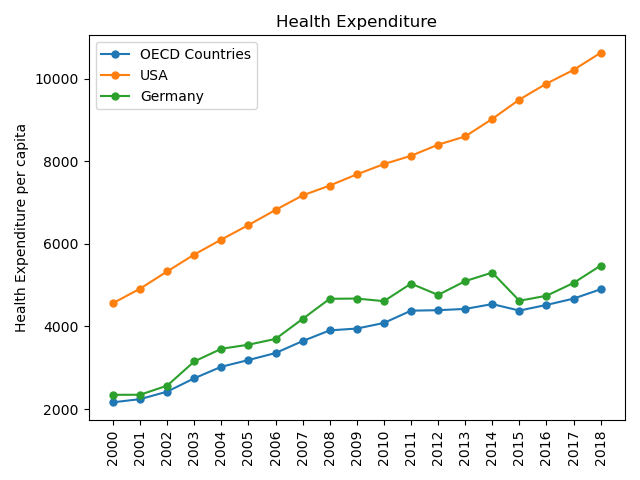

In [28]:
x=health_df.columns[2:21]
y1=health_df.loc[179, '2000':'2018'].values
y2=health_df.loc[249, '2000':'2018'].values
y3=health_df.loc[53, '2000':'2018'].values

tick_label = health_df.columns[2:21]
plt.xticks(np.arange(0,19,1),tick_label,rotation='vertical')
plt.title("Health Expenditure")
#plt.xlabel("Years")
plt.ylabel("Health Expenditure per capita") 

plt.plot(x,y1, marker='o', markersize=5) #oecd
plt.plot(x,y2, marker='o', markersize=5) #usa
plt.plot(x,y3, marker='o', markersize=5) #germany

labels=["OECD Countries", "USA", "Germany"]
plt.legend(labels)


plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


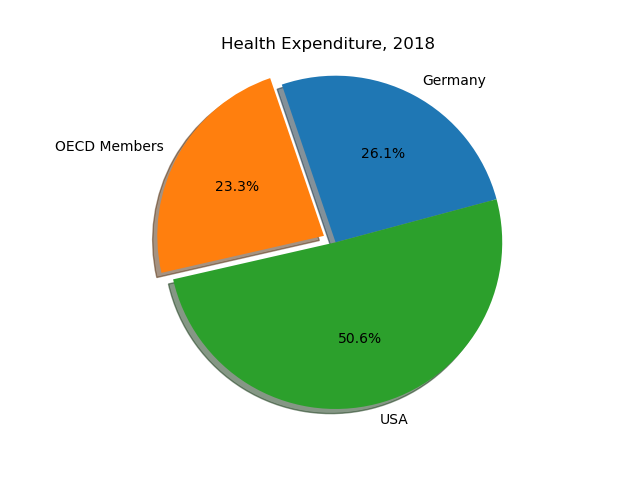

In [29]:
plt.subplot()

labels=['Germany', 'OECD Members', 'USA']
sizes=health_df['2018'] #2013

plt.pie(sizes, explode=(0,0.08,0), labels=labels, autopct="%1.1f%%", shadow=True, startangle=15)

plt.title("Health Expenditure, 2018")
plt.axis('equal')

plt.show()


In [30]:
# Summary statistics
health_df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,3024.145760,3167.351662,3440.688890,3879.971889,4196.000173,4399.907098,4625.206792,5000.356707,5328.384446,5434.998642,5542.065472,5849.665767,5851.760260,6040.189356,6289.609167,6165.934017,6380.085398,6645.254000,6998.572931
std,1337.004182,1514.386013,1639.962966,1624.747930,1666.285938,1789.149260,1909.348391,1899.888683,1843.438980,1978.870537,2084.898032,2002.423062,2213.910096,2241.819838,2398.286674,2882.121851,3031.198516,3092.658711,3152.605646
min,2163.627467,2240.499566,2422.082052,2745.835834,3024.606476,3186.839947,3356.591324,3646.104790,3904.817400,3948.965165,4084.234501,4381.756090,4393.193866,4424.219925,4540.897324,4384.504689,4520.350922,4673.457800,4899.667035
25%,2253.991101,2293.557278,2494.786753,2949.308176,3242.208023,3372.519094,3527.256477,3914.452053,4287.226327,4311.874184,4348.022524,4709.120477,4578.020761,4760.520363,4922.608086,4503.355616,4631.192551,4863.065570,5185.934592
50%,2344.354736,2346.614990,2567.491455,3152.780518,3459.809570,3558.198242,3697.921631,4182.799316,4669.635254,4674.783203,4611.810547,5036.484863,4762.847656,5096.820801,5304.318848,4622.206543,4742.034180,5052.673340,5472.202148
75%,3454.404907,3630.777710,3949.992310,4447.039917,4781.697021,5006.440674,5259.514526,5677.482666,6040.167969,6178.015381,6270.980957,6583.620605,6581.043457,6848.174072,7163.965088,7056.648682,7309.952637,7631.152100,8048.025879
max,4564.455078,4914.940430,5332.493164,5741.299316,6103.584473,6454.683105,6821.107422,7172.166016,7410.700684,7681.247559,7930.151367,8130.756348,8399.239258,8599.527344,9023.611328,9491.090820,9877.871094,10209.630859,10623.849609
